In [13]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"

# Unsupervised Learning and Preprocessing
### Types of unsupervised learning
### Challenges in unsupervised learning
## Preprocessing and Scaling

C:\Users\Dan\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


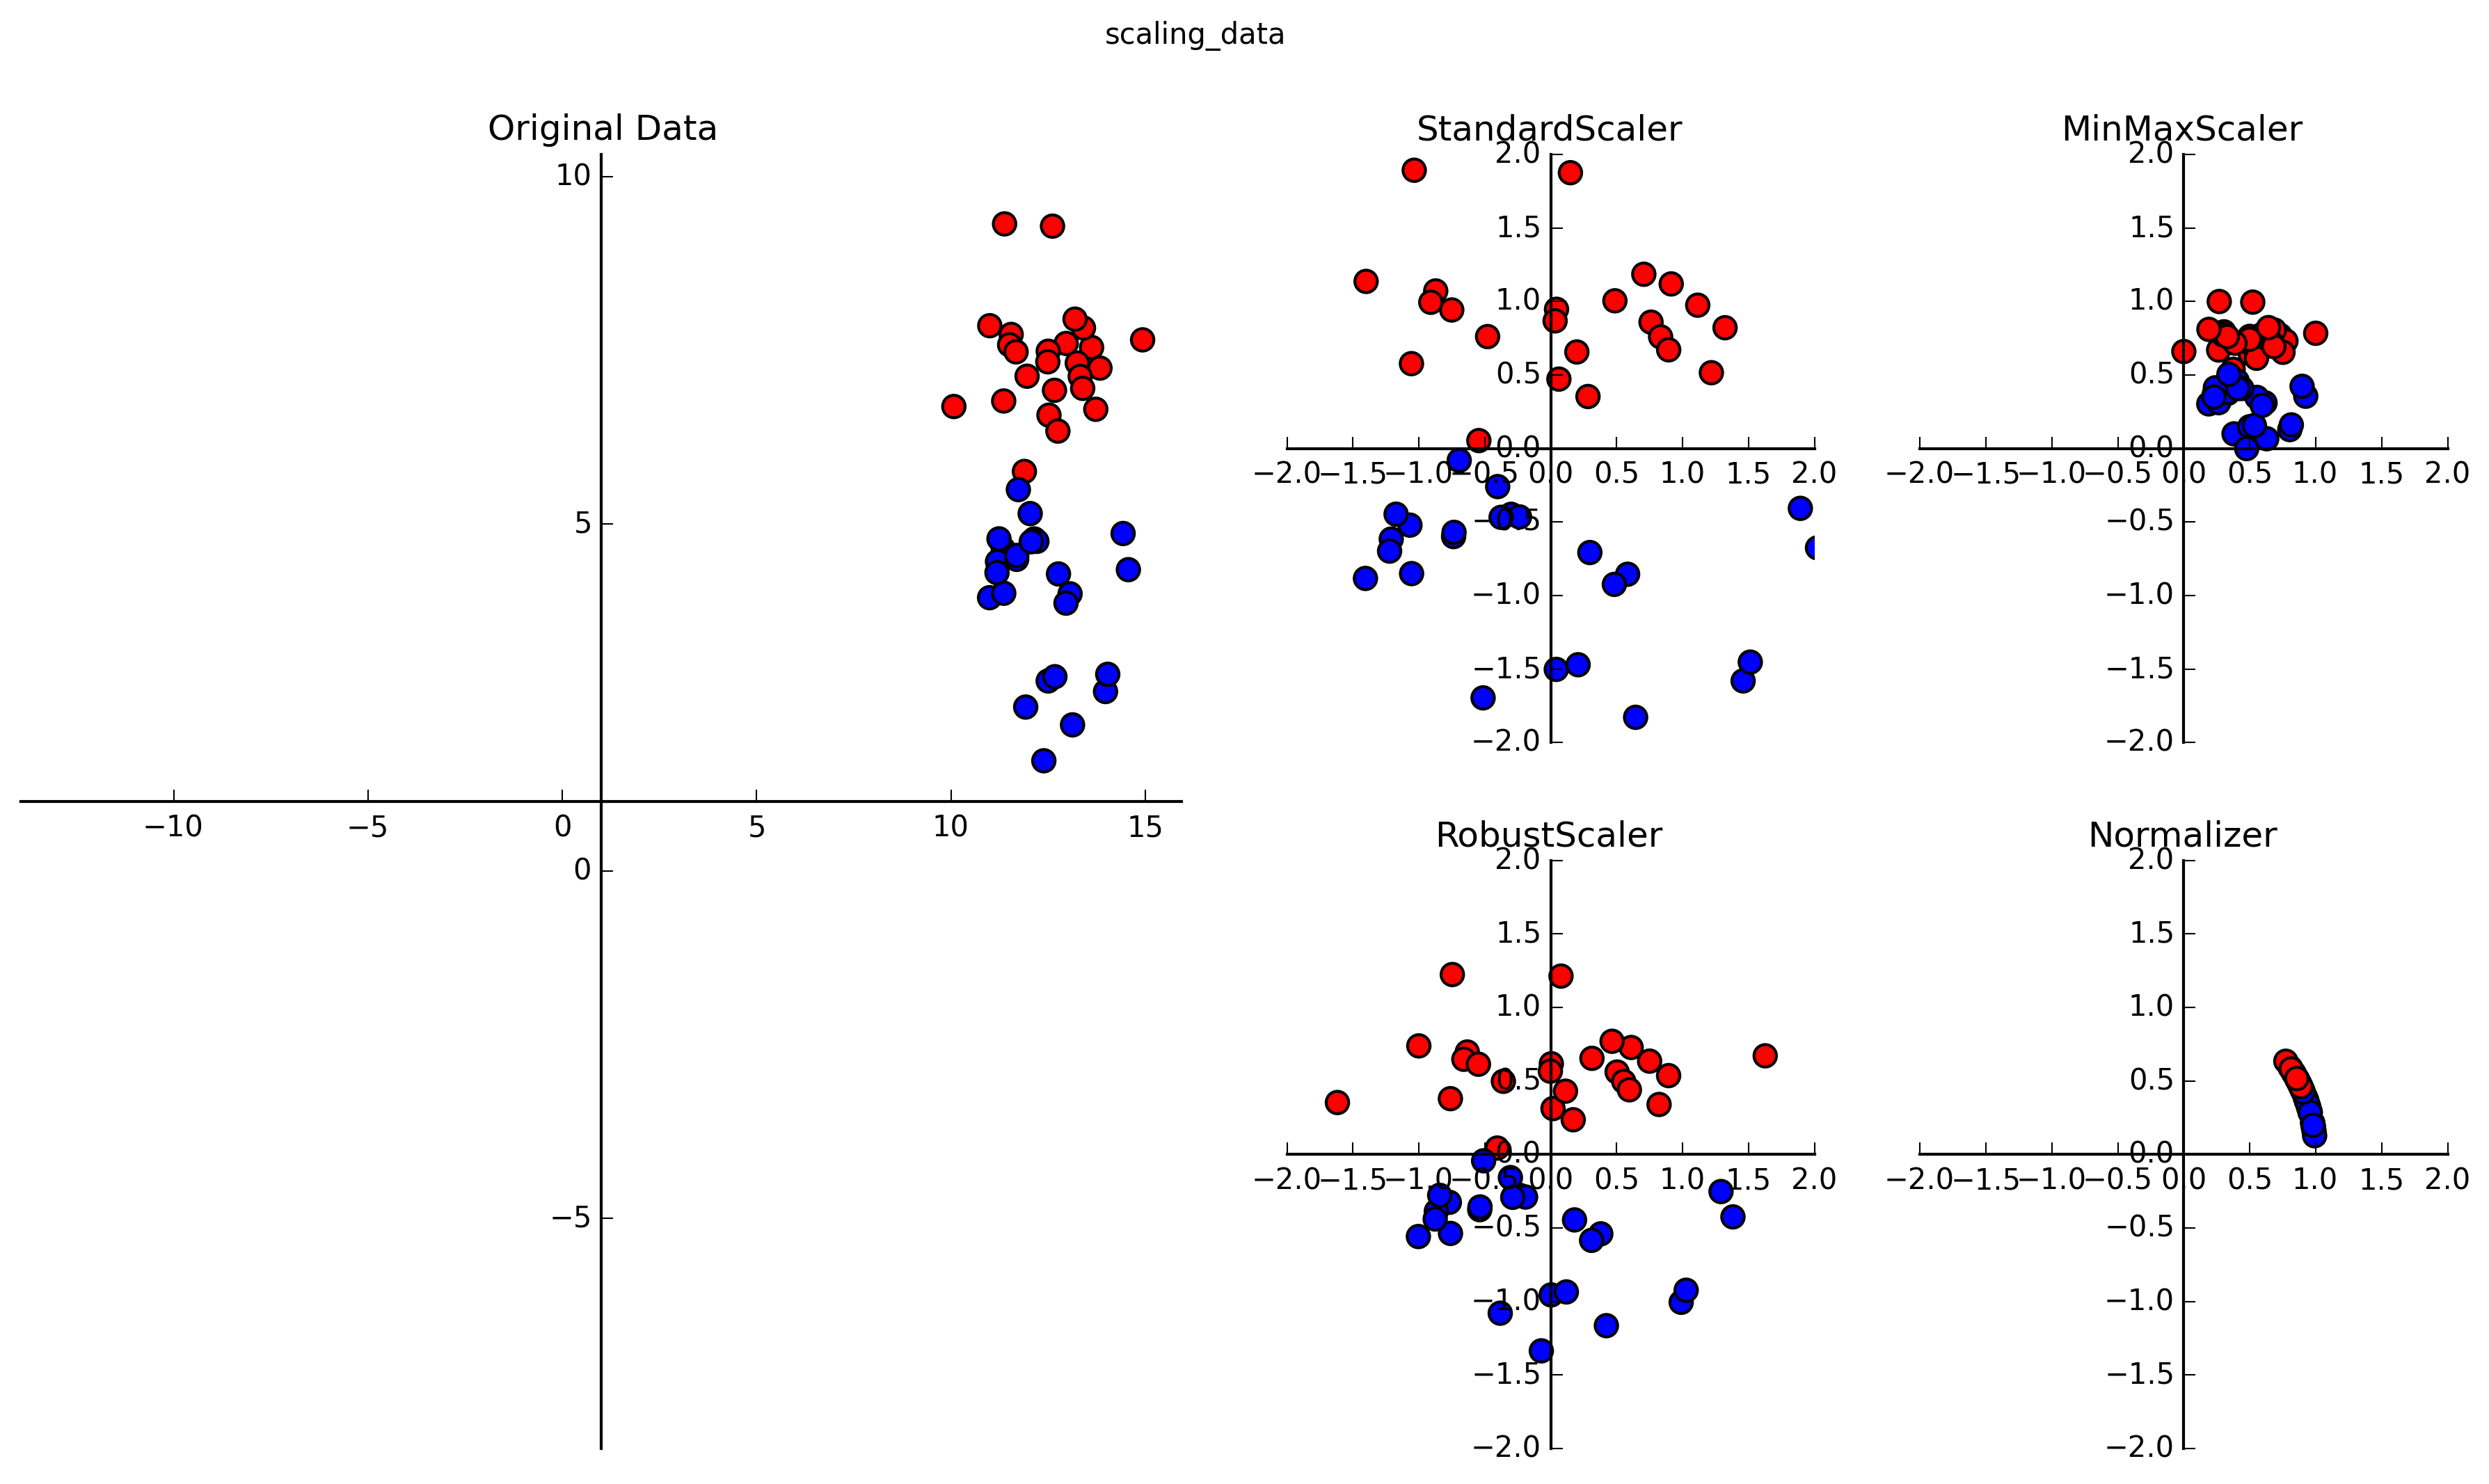

In [2]:
mglearn.plots.plot_scaling()
plt.suptitle("scaling_data");

### Different kinds of preprocessing
### Applying data transformations

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.cross_validation import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [5]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
# don't print using scientific notation
np.set_printoptions(suppress=True, precision=2)
# transform data
X_train_scaled = scaler.transform(X_train)
# print data set properties before and after scaling
print("transformed shape: %s" % (X_train_scaled.shape,))
print("per-feature minimum before scaling:\n %s" % X_train.min(axis=0))
print("per-feature maximum before scaling:\n %s" % X_train.max(axis=0))
print("per-feature minimum after scaling:\n %s" % X_train_scaled.min(axis=0))
print("per-feature maximum after scaling:\n %s" % X_train_scaled.max(axis=0))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [   6.98    9.71   43.79  143.5     0.05    0.02    0.      0.      0.11
    0.05    0.12    0.36    0.76    6.8     0.      0.      0.      0.
    0.01    0.      7.93   12.02   50.41  185.2     0.07    0.03    0.
    0.      0.16    0.06]
per-feature maximum before scaling:
 [   28.11    39.28   188.5   2501.       0.16     0.29     0.43     0.2
     0.3      0.1      2.87     4.88    21.98   542.2      0.03     0.14
     0.4      0.05     0.06     0.03    36.04    49.54   251.2   4254.
     0.22     0.94     1.17     0.29     0.58     0.15]
per-feature minimum after scaling:
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
per-feature maximum after scaling:
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [7]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling: %s" % X_test_scaled.min(axis=0))
print("per-feature maximum after scaling: %s" % X_test_scaled.max(axis=0))

per-feature minimum after scaling: [ 0.03  0.02  0.03  0.01  0.14  0.04  0.    0.    0.15 -0.01 -0.    0.01
  0.    0.    0.04  0.01  0.    0.   -0.03  0.01  0.03  0.06  0.02  0.01
  0.11  0.03  0.    0.   -0.   -0.  ]
per-feature maximum after scaling: [ 0.96  0.82  0.96  0.89  0.81  1.22  0.88  0.93  0.93  1.04  0.43  0.5
  0.44  0.28  0.49  0.74  0.77  0.63  1.34  0.39  0.9   0.79  0.85  0.74
  0.92  1.13  1.07  0.92  1.21  1.63]


### Scaling training and test data the same way

C:\Users\Dan\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


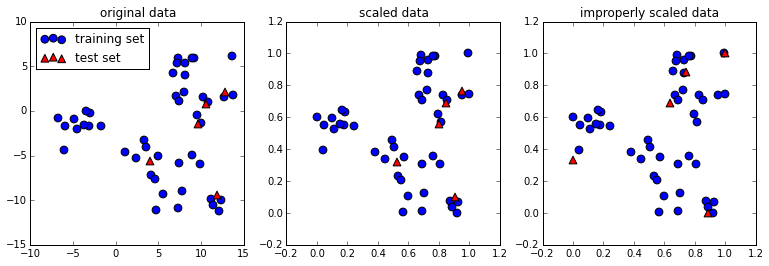

In [14]:
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test set
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test set
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c='b', label="training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c='r', label="test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("original data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c='b', label="training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c='r', label="test set", s=60)
axes[1].set_title("scaled data")

# rescale the test set separately, so that test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c='b', label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^',
                c='r', label="test set", s=60)
axes[2].set_title("improperly scaled data")

### The effect of preprocessing on supervised learning

In [9]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

0.629370629371


In [10]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set

svm.score(X_test_scaled, y_test)

0.965034965034965

In [11]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
svm.score(X_test_scaled, y_test)

0.95804195804195802

## Dimensionality Reduction, Feature Extraction and Manifold Learning
### Principal Component Analysis (PCA)

ValueError: Colormap viridis is not recognized. Possible values are: RdYlBu, winter_r, gist_rainbow_r, RdBu, terrain_r, bone, CMRmap_r, BrBG, hot_r, Greens_r, Reds_r, binary_r, gist_yarg, BuGn_r, winter, PuOr_r, RdYlBu_r, Wistia, copper, hot, PuBuGn, Set2_r, gist_heat_r, gray, CMRmap, Spectral_r, YlOrBr, cubehelix, coolwarm, nipy_spectral_r, Oranges_r, gist_earth, jet, RdGy, Spectral, Greys_r, Blues, prism_r, Set1_r, ocean, hsv_r, Dark2, YlOrRd, RdPu_r, Dark2_r, autumn_r, binary, gist_ncar_r, terrain, Set3_r, summer, BrBG_r, RdGy_r, Set3, Accent_r, flag, BuPu, pink, YlGn, brg_r, OrRd, spectral_r, YlGnBu, flag_r, cool, prism, BuPu_r, Set1, YlOrRd_r, RdYlGn, gist_stern, Set2, RdPu, YlGnBu_r, Paired_r, PuBu, gist_yarg_r, PiYG_r, hsv, cubehelix_r, bone_r, PiYG, Pastel2, Blues_r, Greys, gist_gray_r, copper_r, afmhot, brg, gist_earth_r, pink_r, YlGn_r, Accent, gnuplot2_r, gist_gray, coolwarm_r, bwr, gist_ncar, nipy_spectral, gist_heat, Reds, PuRd_r, gnuplot2, jet_r, rainbow_r, RdYlGn_r, seismic, summer_r, bwr_r, spring_r, Purples, PRGn_r, Wistia_r, PRGn, gist_rainbow, YlOrBr_r, Pastel2_r, spring, Purples_r, PuBuGn_r, GnBu, gnuplot, spectral, cool_r, ocean_r, rainbow, PuRd, Pastel1_r, gnuplot_r, seismic_r, GnBu_r, afmhot_r, BuGn, gray_r, autumn, RdBu_r, Oranges, Pastel1, Paired, OrRd_r, PuBu_r, gist_stern_r, PuOr, Greens

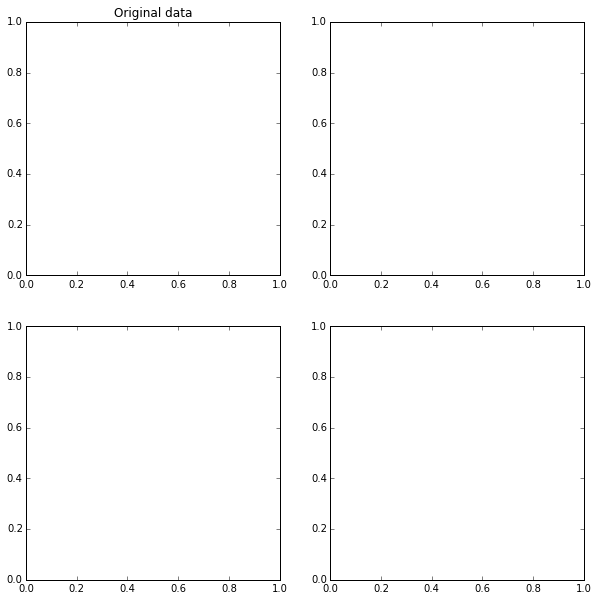

In [15]:
mglearn.plots.plot_pca_illustration()
plt.suptitle("pca_illustration");

#### Applying PCA to the cancer dataset for visualization

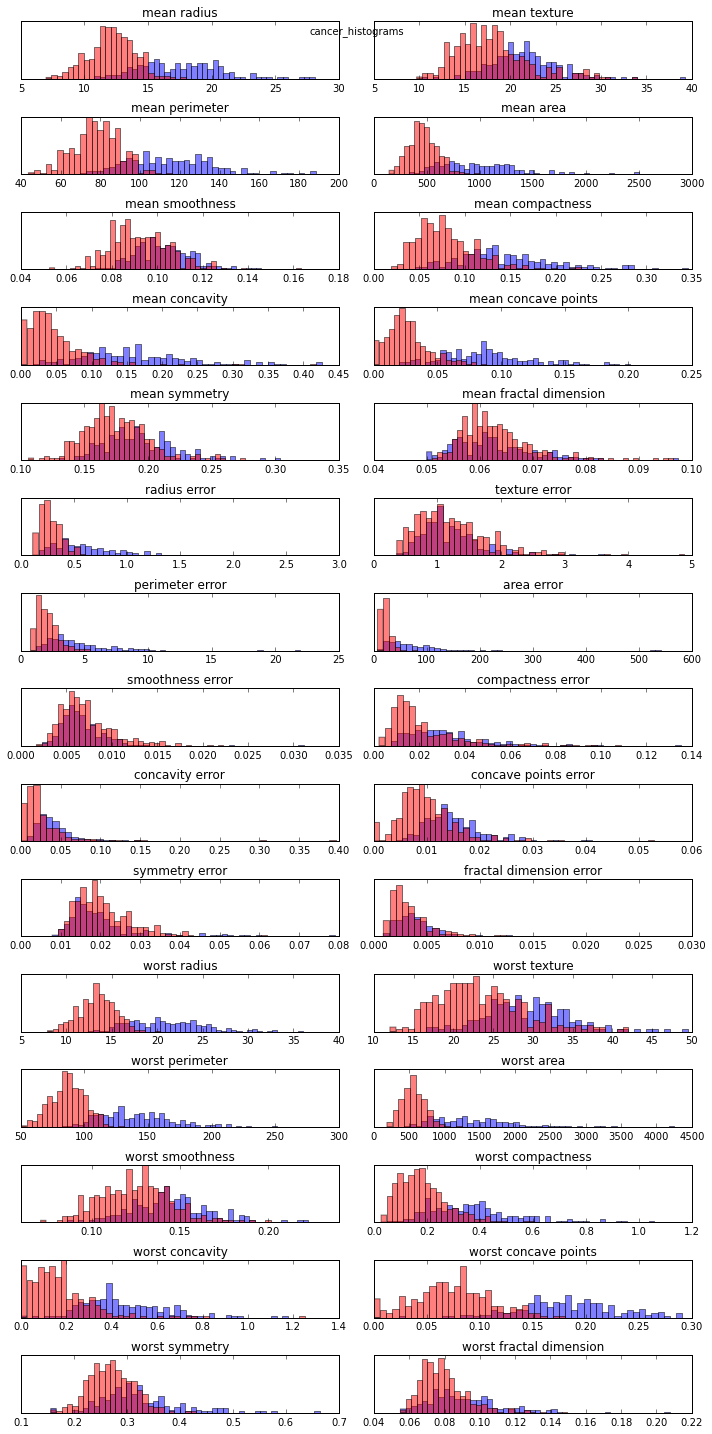

In [16]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='b', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='r', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
fig.tight_layout()
plt.suptitle("cancer_histograms")

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [18]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: %s" % str(X_scaled.shape))
print("Reduced shape: %s" % str(X_pca.shape))

Original shape: (569, 30)
Reduced shape: (569, 2)


C:\Users\Dan\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


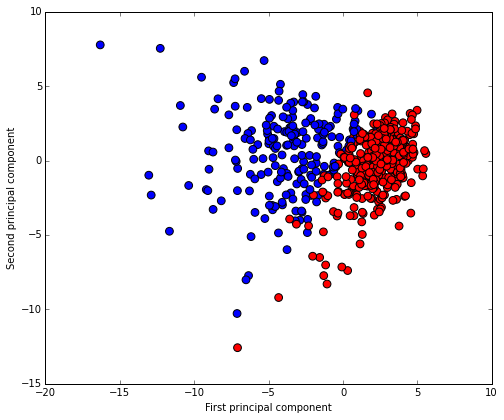

In [19]:
# plot fist vs second principal component, color by class
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target, cmap=mglearn.tools.cm, s=60)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [17]:
pca.components_.shape

(2, 30)

In [18]:
print(pca.components_)

[[-0.22 -0.1  -0.23 -0.22 -0.14 -0.24 -0.26 -0.26 -0.14 -0.06 -0.21 -0.02
  -0.21 -0.2  -0.01 -0.17 -0.15 -0.18 -0.04 -0.1  -0.23 -0.1  -0.24 -0.22
  -0.13 -0.21 -0.23 -0.25 -0.12 -0.13]
 [ 0.23  0.06  0.22  0.23 -0.19 -0.15 -0.06  0.03 -0.19 -0.37  0.11 -0.09
   0.09  0.15 -0.2  -0.23 -0.2  -0.13 -0.18 -0.28  0.22  0.05  0.2   0.22
  -0.17 -0.14 -0.1   0.01 -0.14 -0.28]]


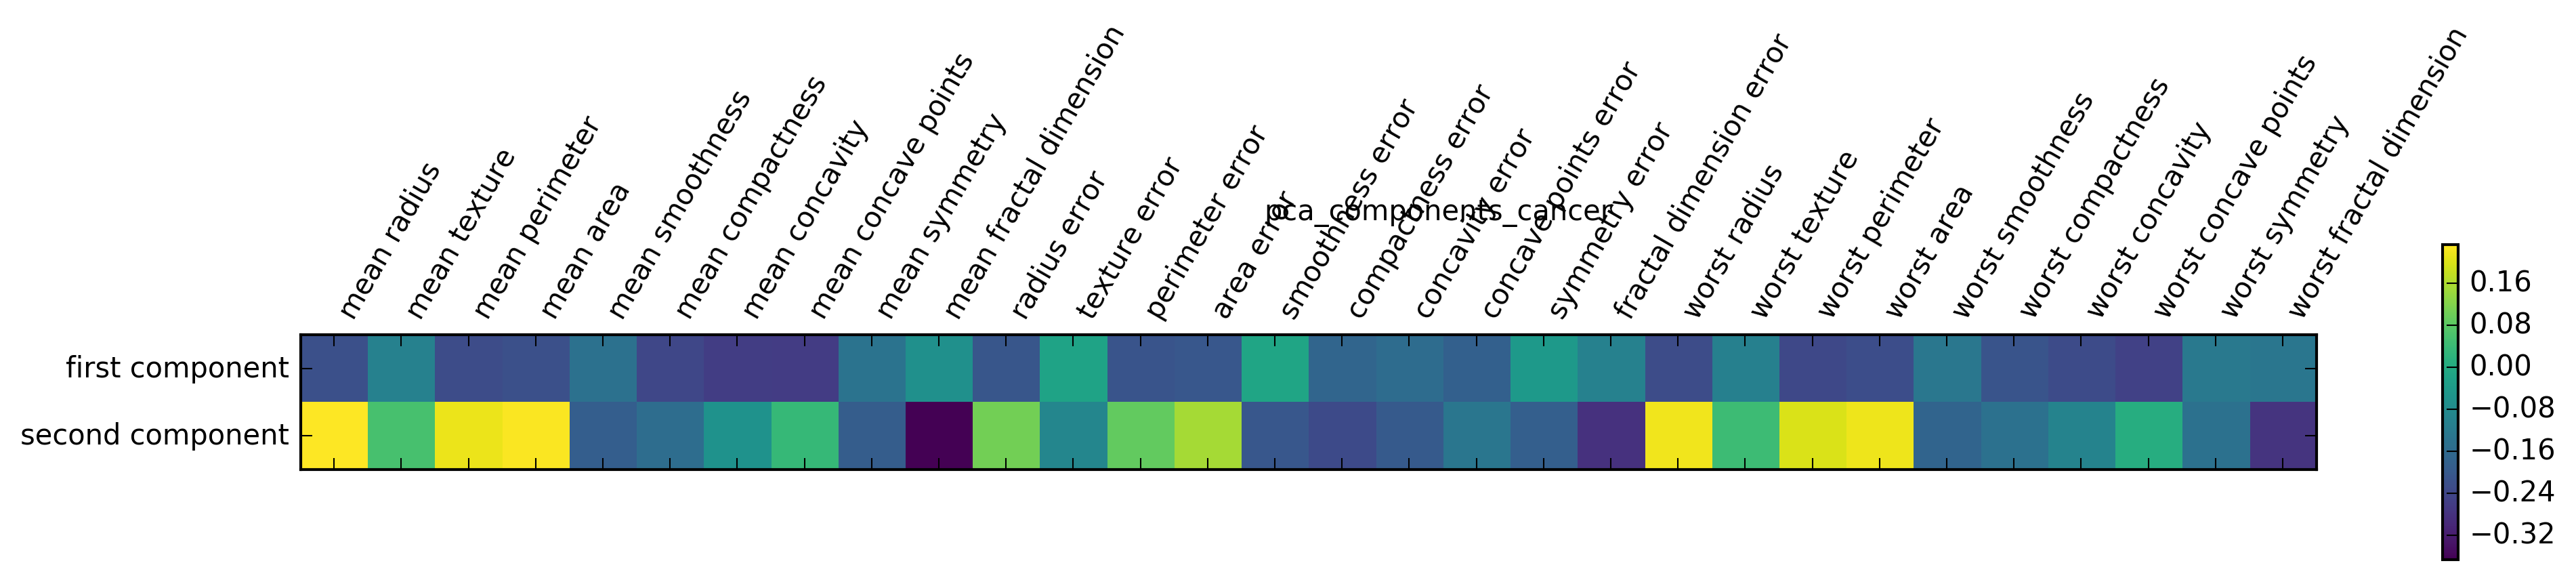

In [19]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left');
plt.suptitle("pca_components_cancer")

#### Eigenfaces for feature extraction

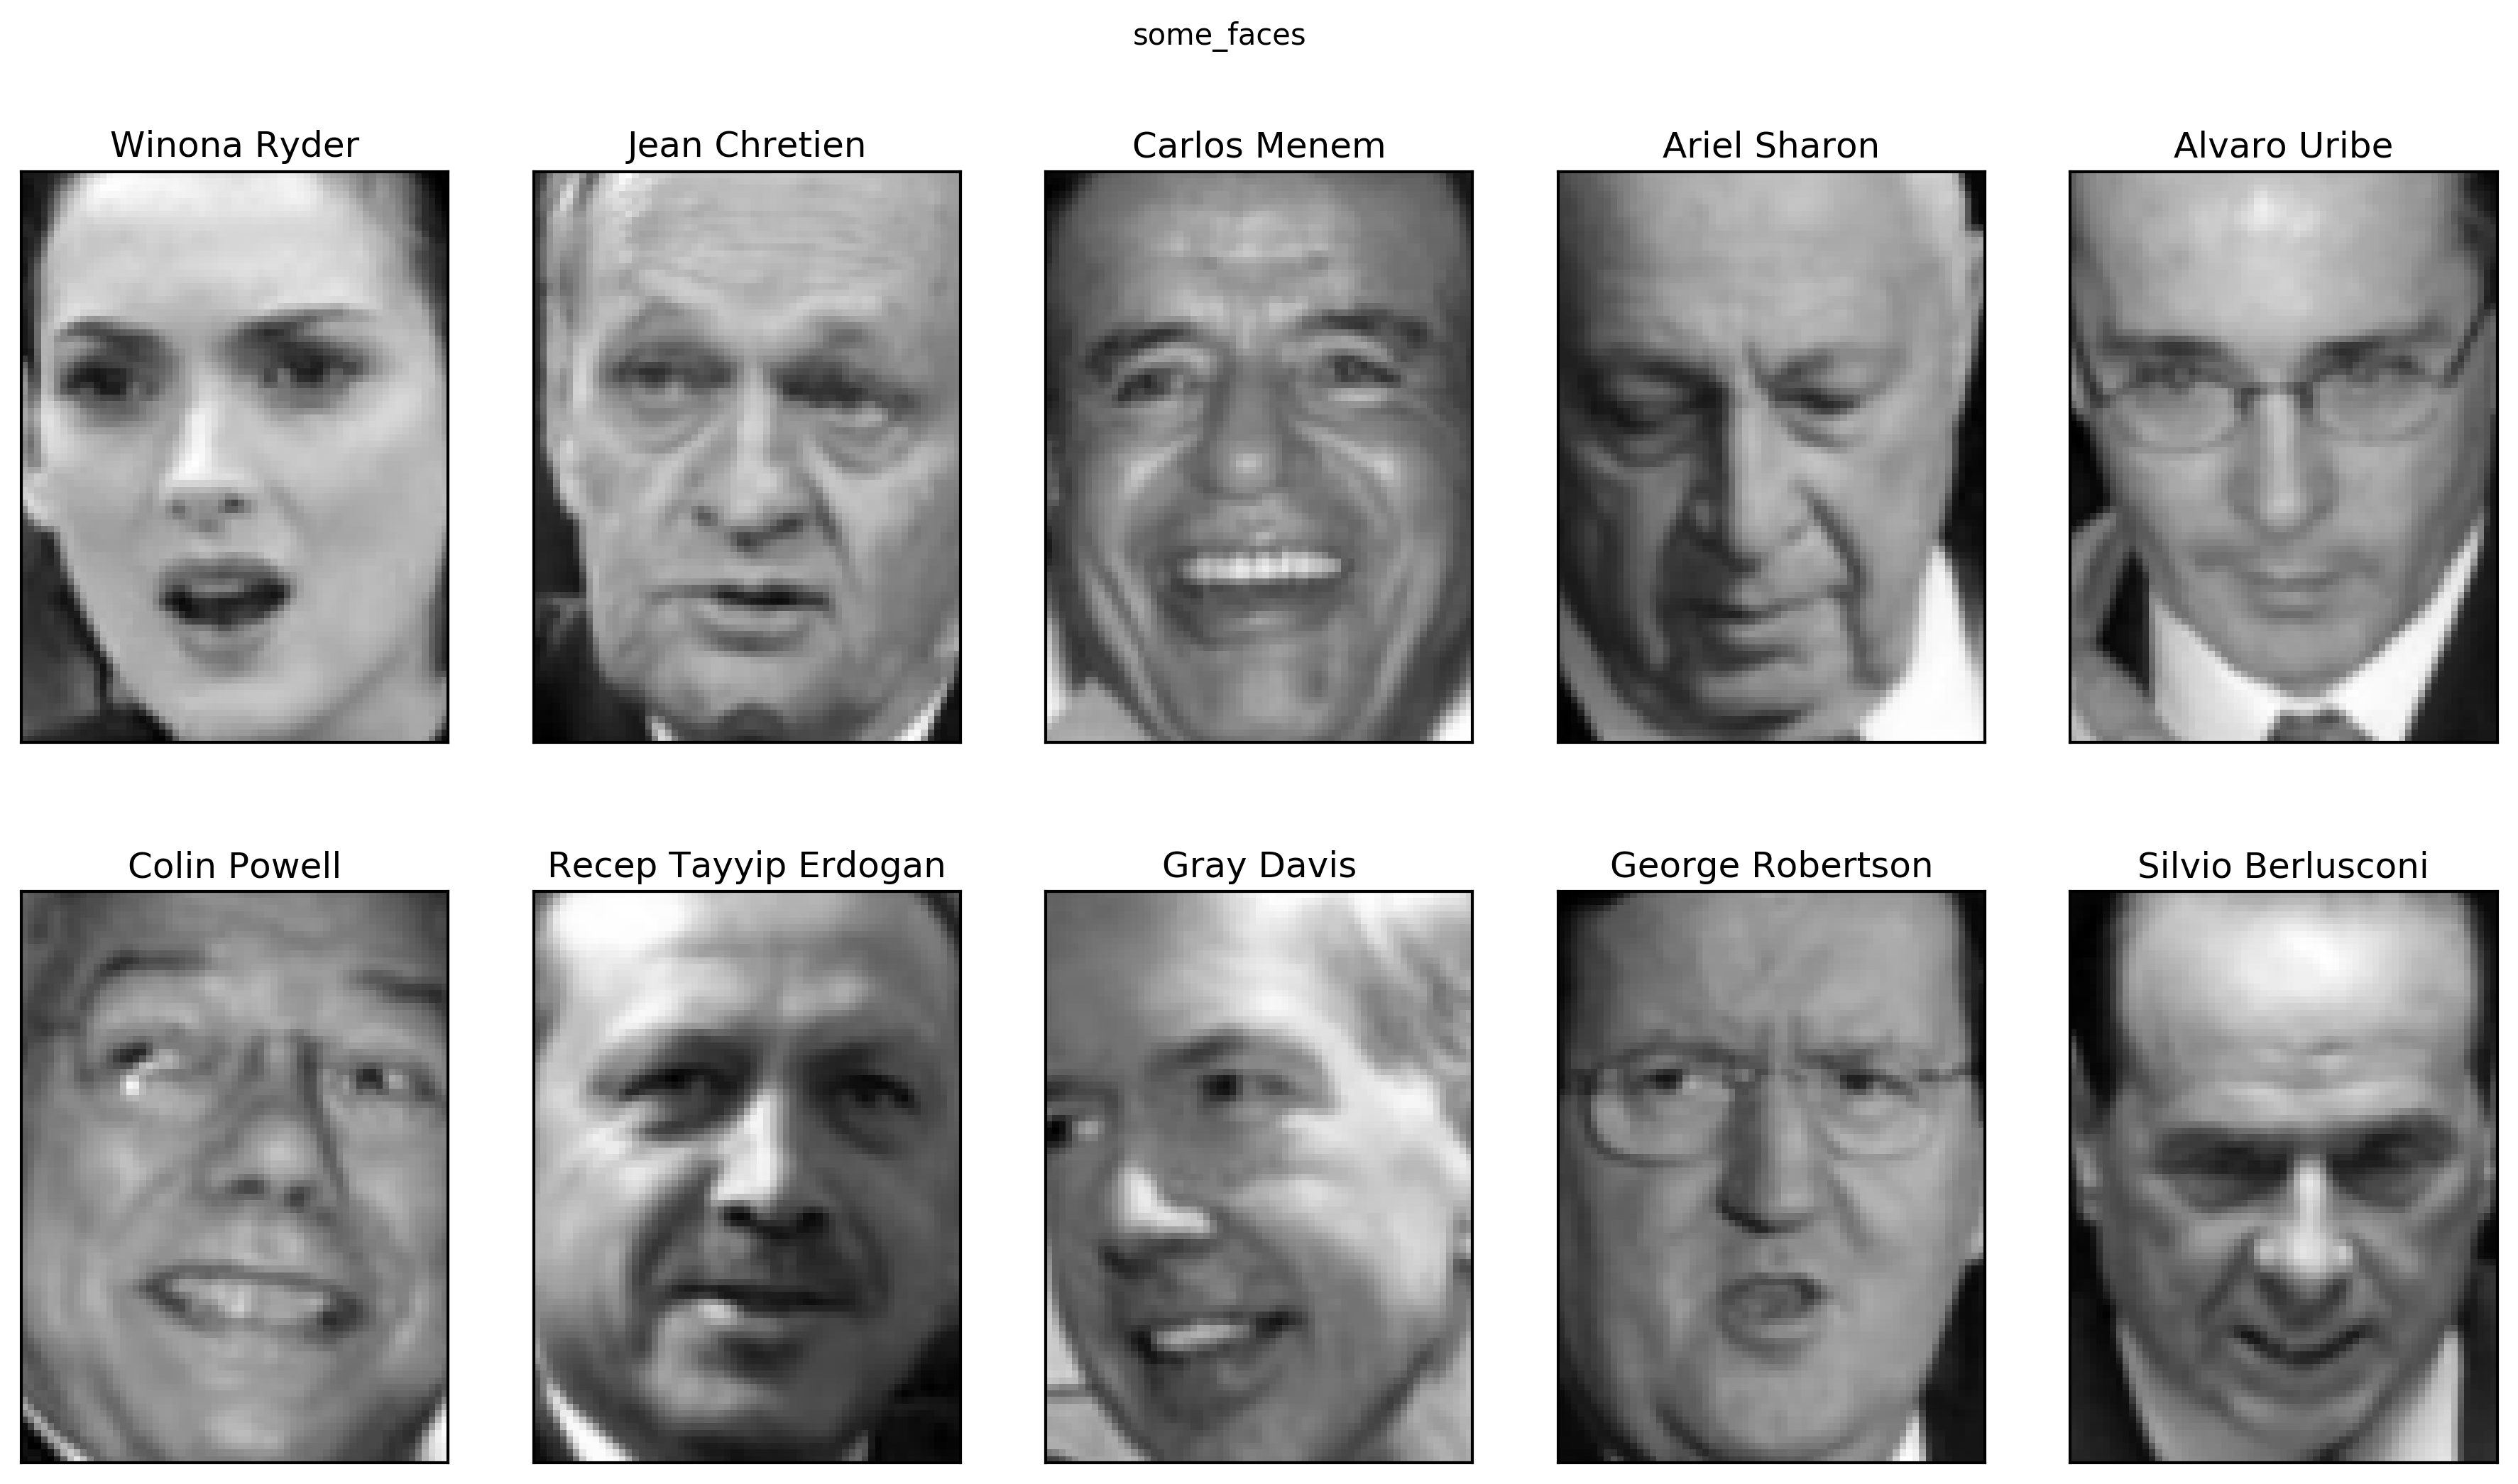

In [20]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
plt.suptitle("some_faces")

In [21]:
print(people.images.shape)
print(len(people.target_names))

(3023, 87, 65)
62


In [22]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [23]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.26615969581749049

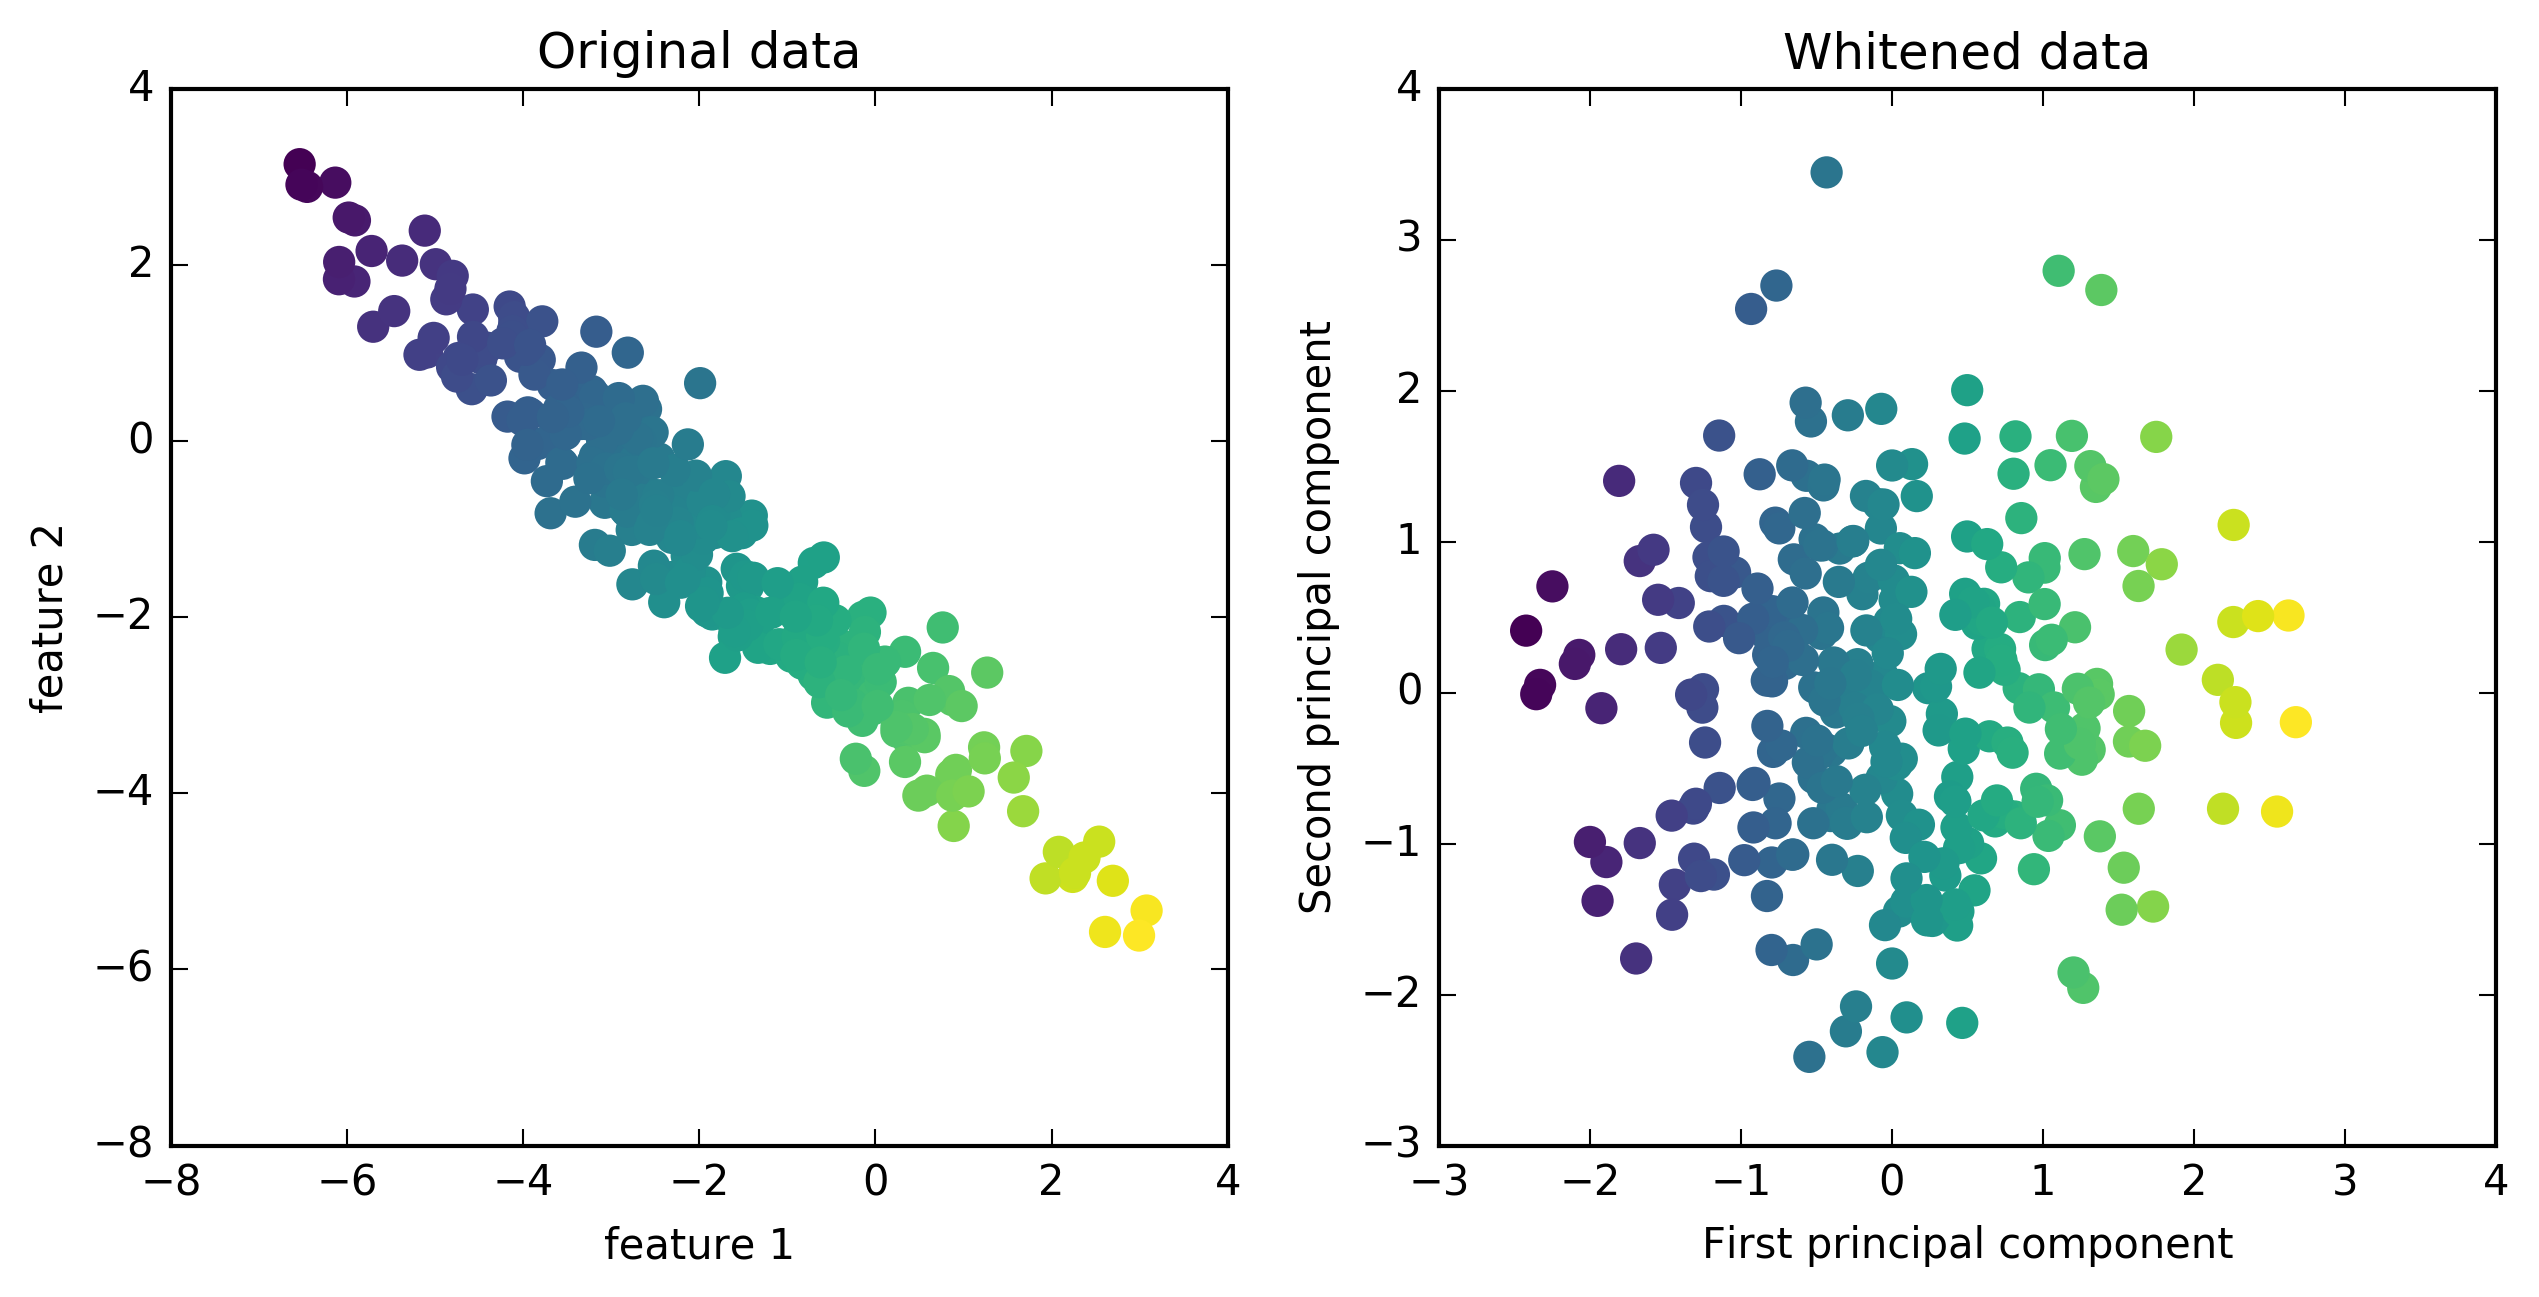

In [25]:
mglearn.plots.plot_pca_whitening()

In [26]:
pca = PCA(n_components=100, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)

(1537, 100)


In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.36882129277566539

In [28]:
pca.components_.shape

(100, 5655)

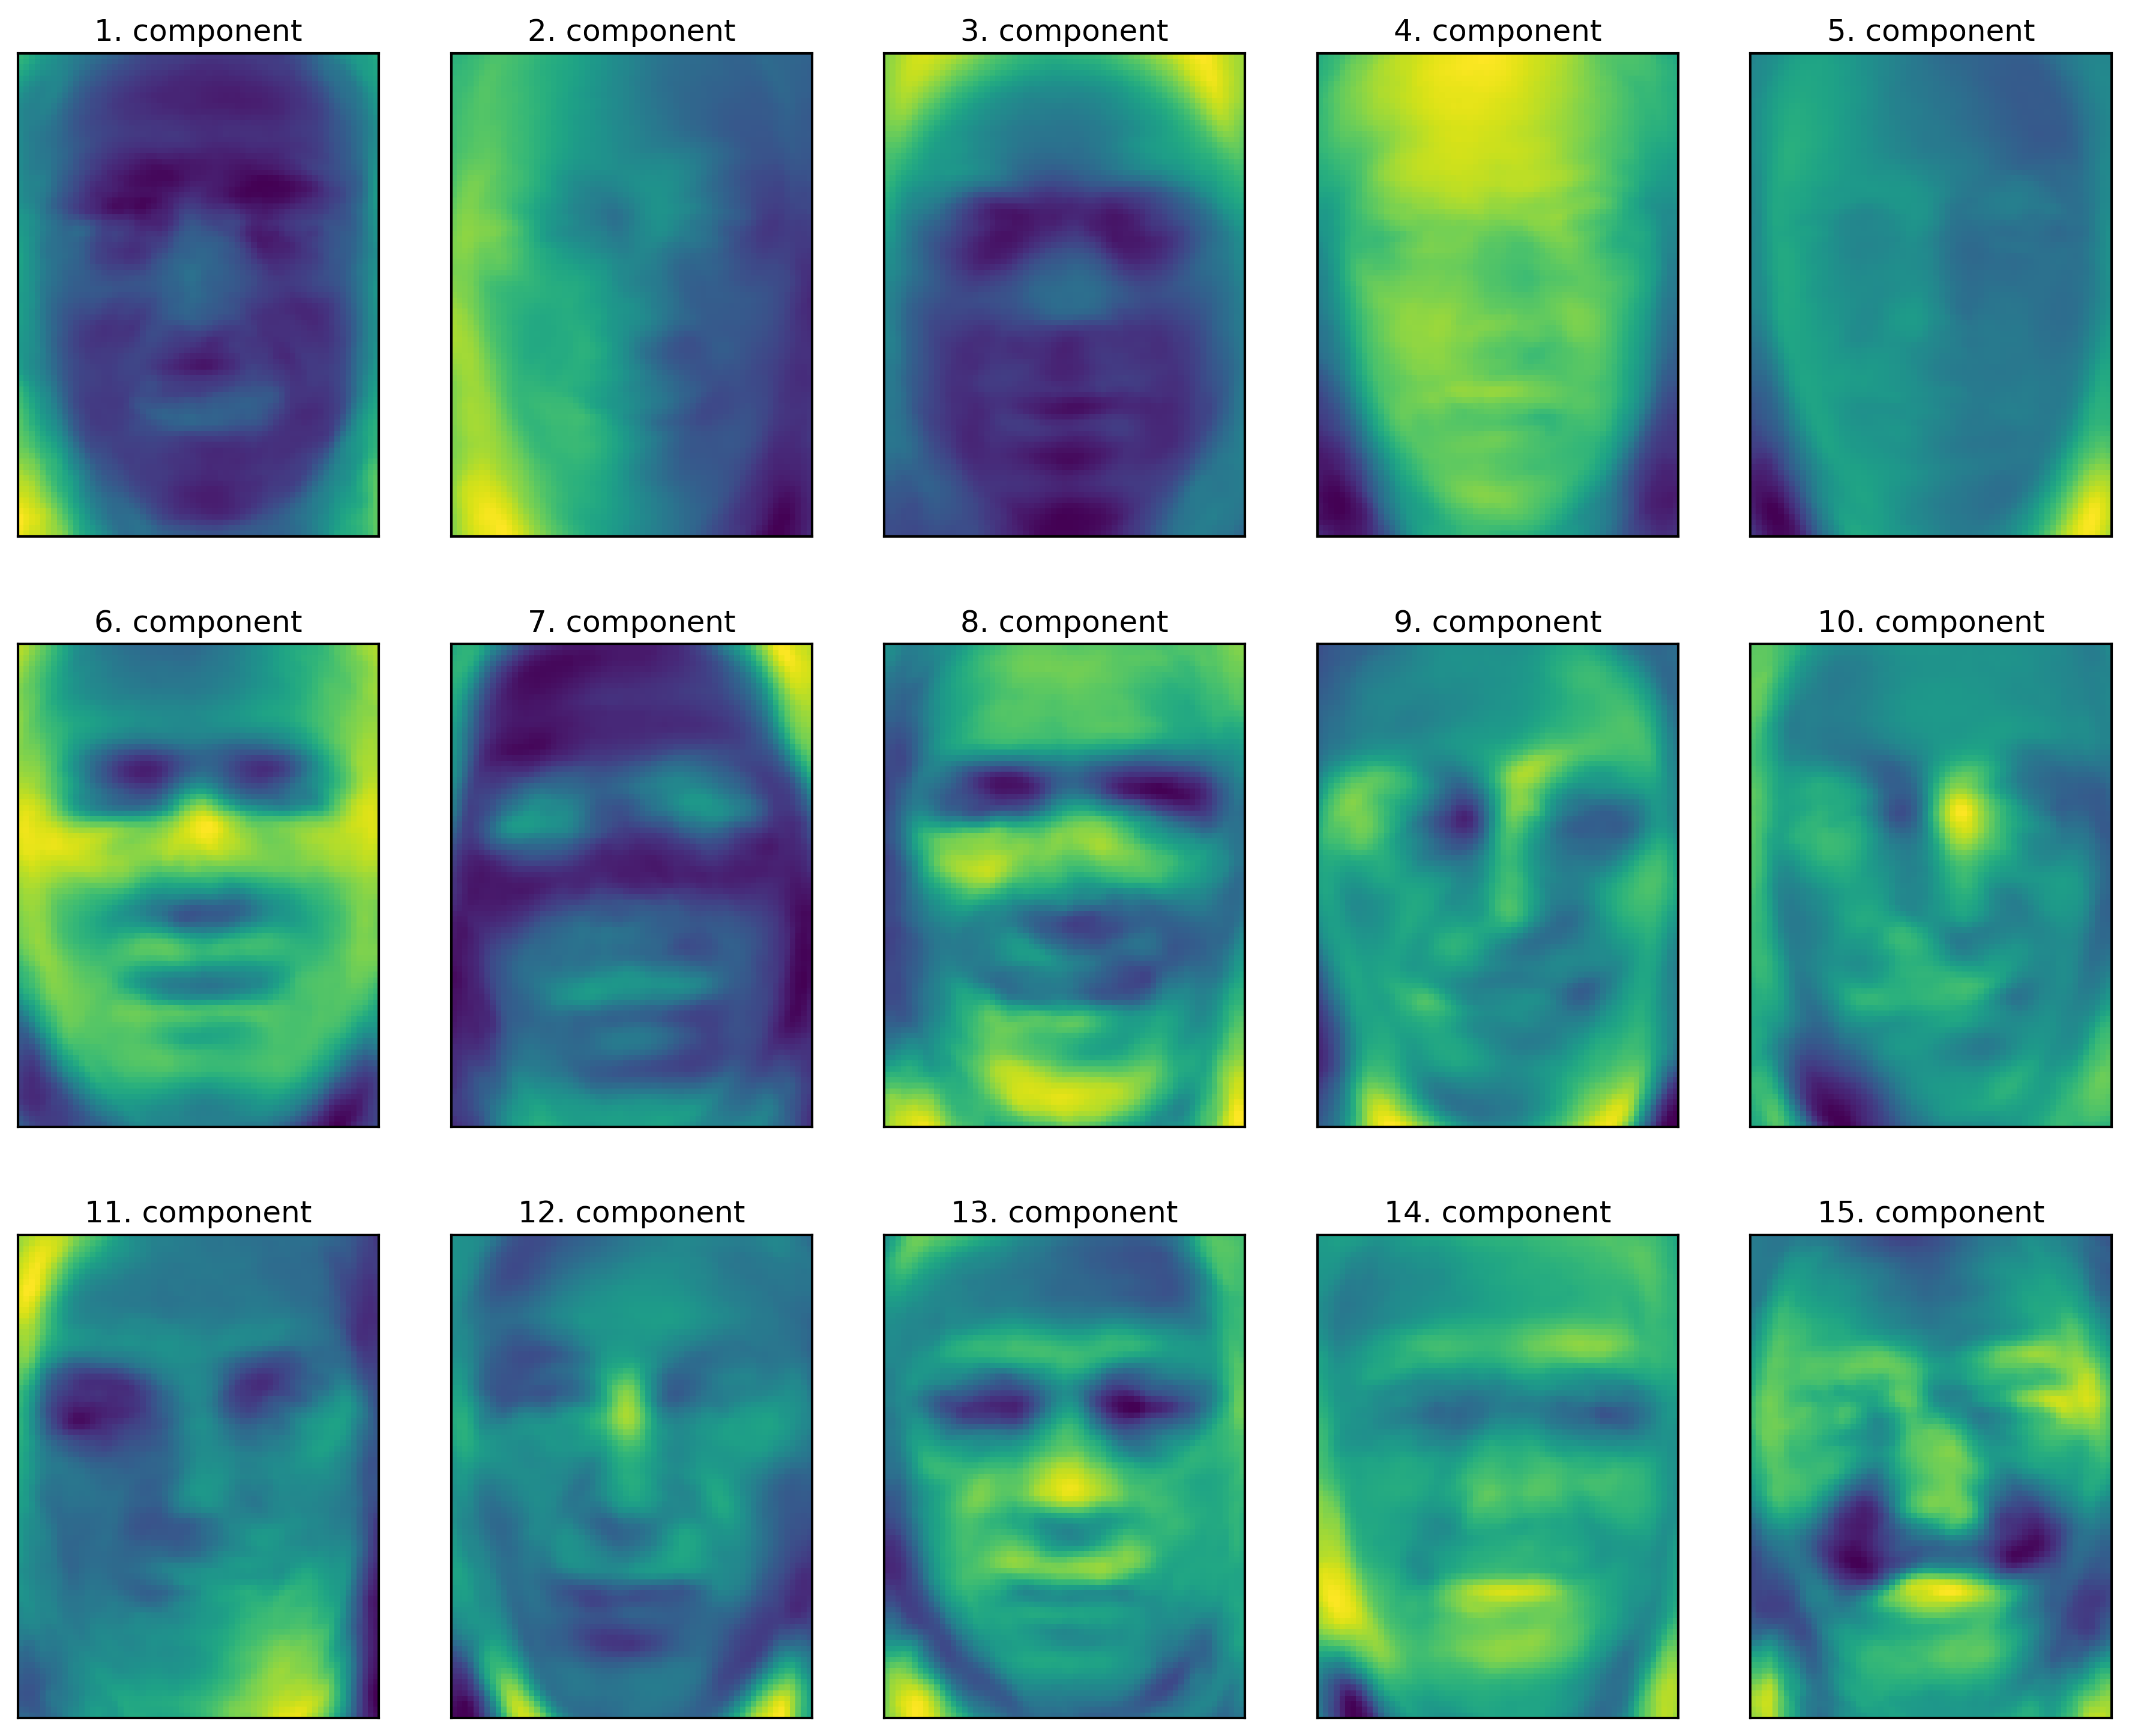

In [29]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("pca_face_components")
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("%d. component" % (i + 1))

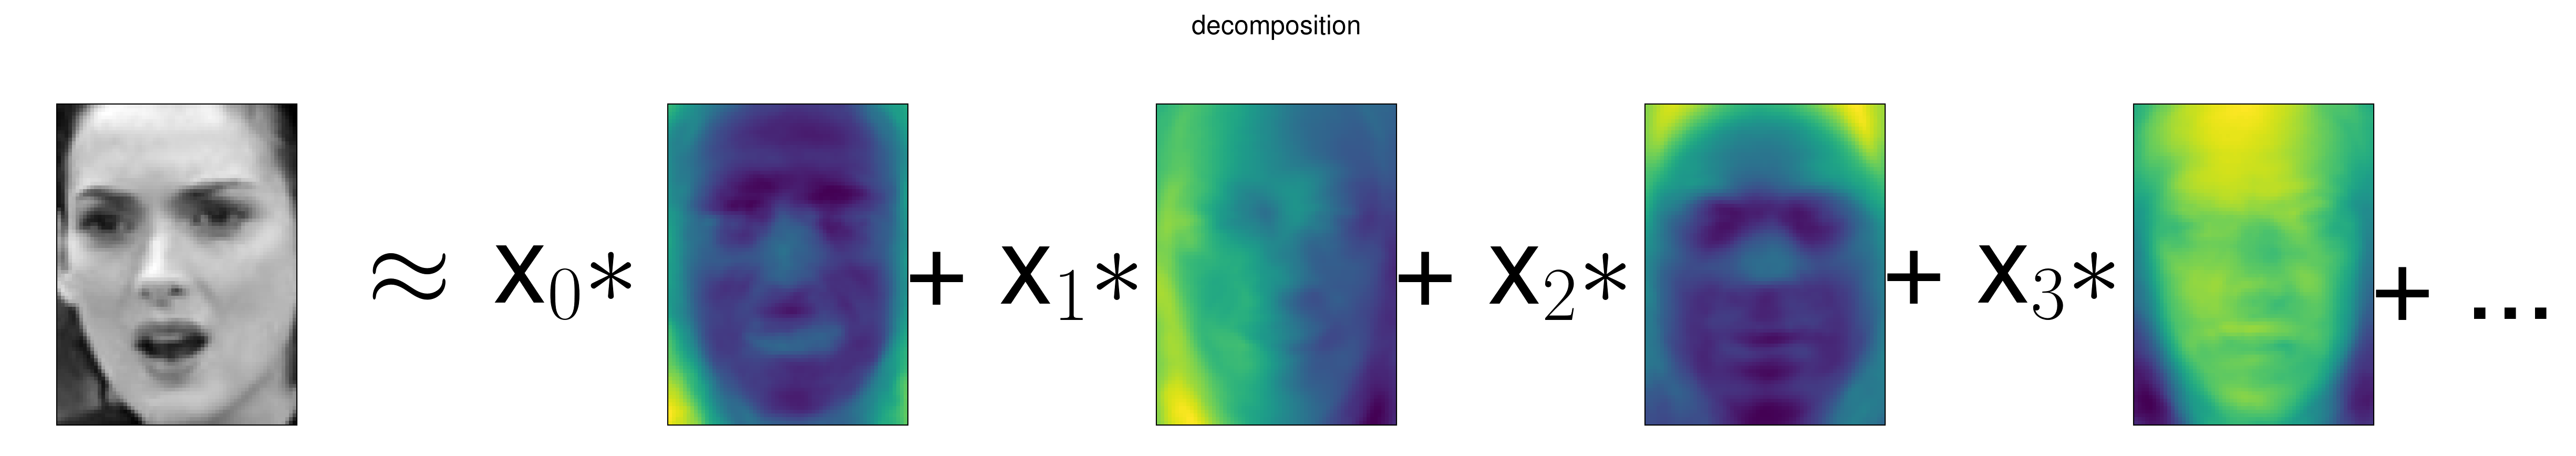

In [30]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=7, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=7, cmap="viridis")

    ab = AnnotationBbox(imagebox, (.3 + .2 * i, 0.4),
                        pad=0.0,
                        xycoords='data'
                        )
    ax.add_artist(ab)
    if i == 0:
        plt.text(.18, .25, 'x_%d *' % i, fontdict={'fontsize': 50})
    else:
        plt.text(.15 + .2 * i, .25, '+ x_%d *' % i, fontdict={'fontsize': 50})

plt.text(.95, .25, '+ ...', fontdict={'fontsize': 50})

plt.rc('text', usetex=True)
plt.text(.13, .3, r'\approx', fontdict={'fontsize': 50})
plt.axis("off")
plt.title("decomposition")

In [31]:
plt.rc('text', usetex=False) # THIS SHOULD NOT SHOW IN THE BOOK! it's needed for the figure above

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[ 0.036601, ...,  0.742484],
       ..., 
       [ 0.105882, ...,  0.393464]], dtype=float32), 
array([[ 0.162091, ...,  0.677124],
       ..., 
       [ 0.109804, ...,  0.07451 ]], dtype=float32))
_______________________________________________________pca_faces - 10.9s, 0.2min


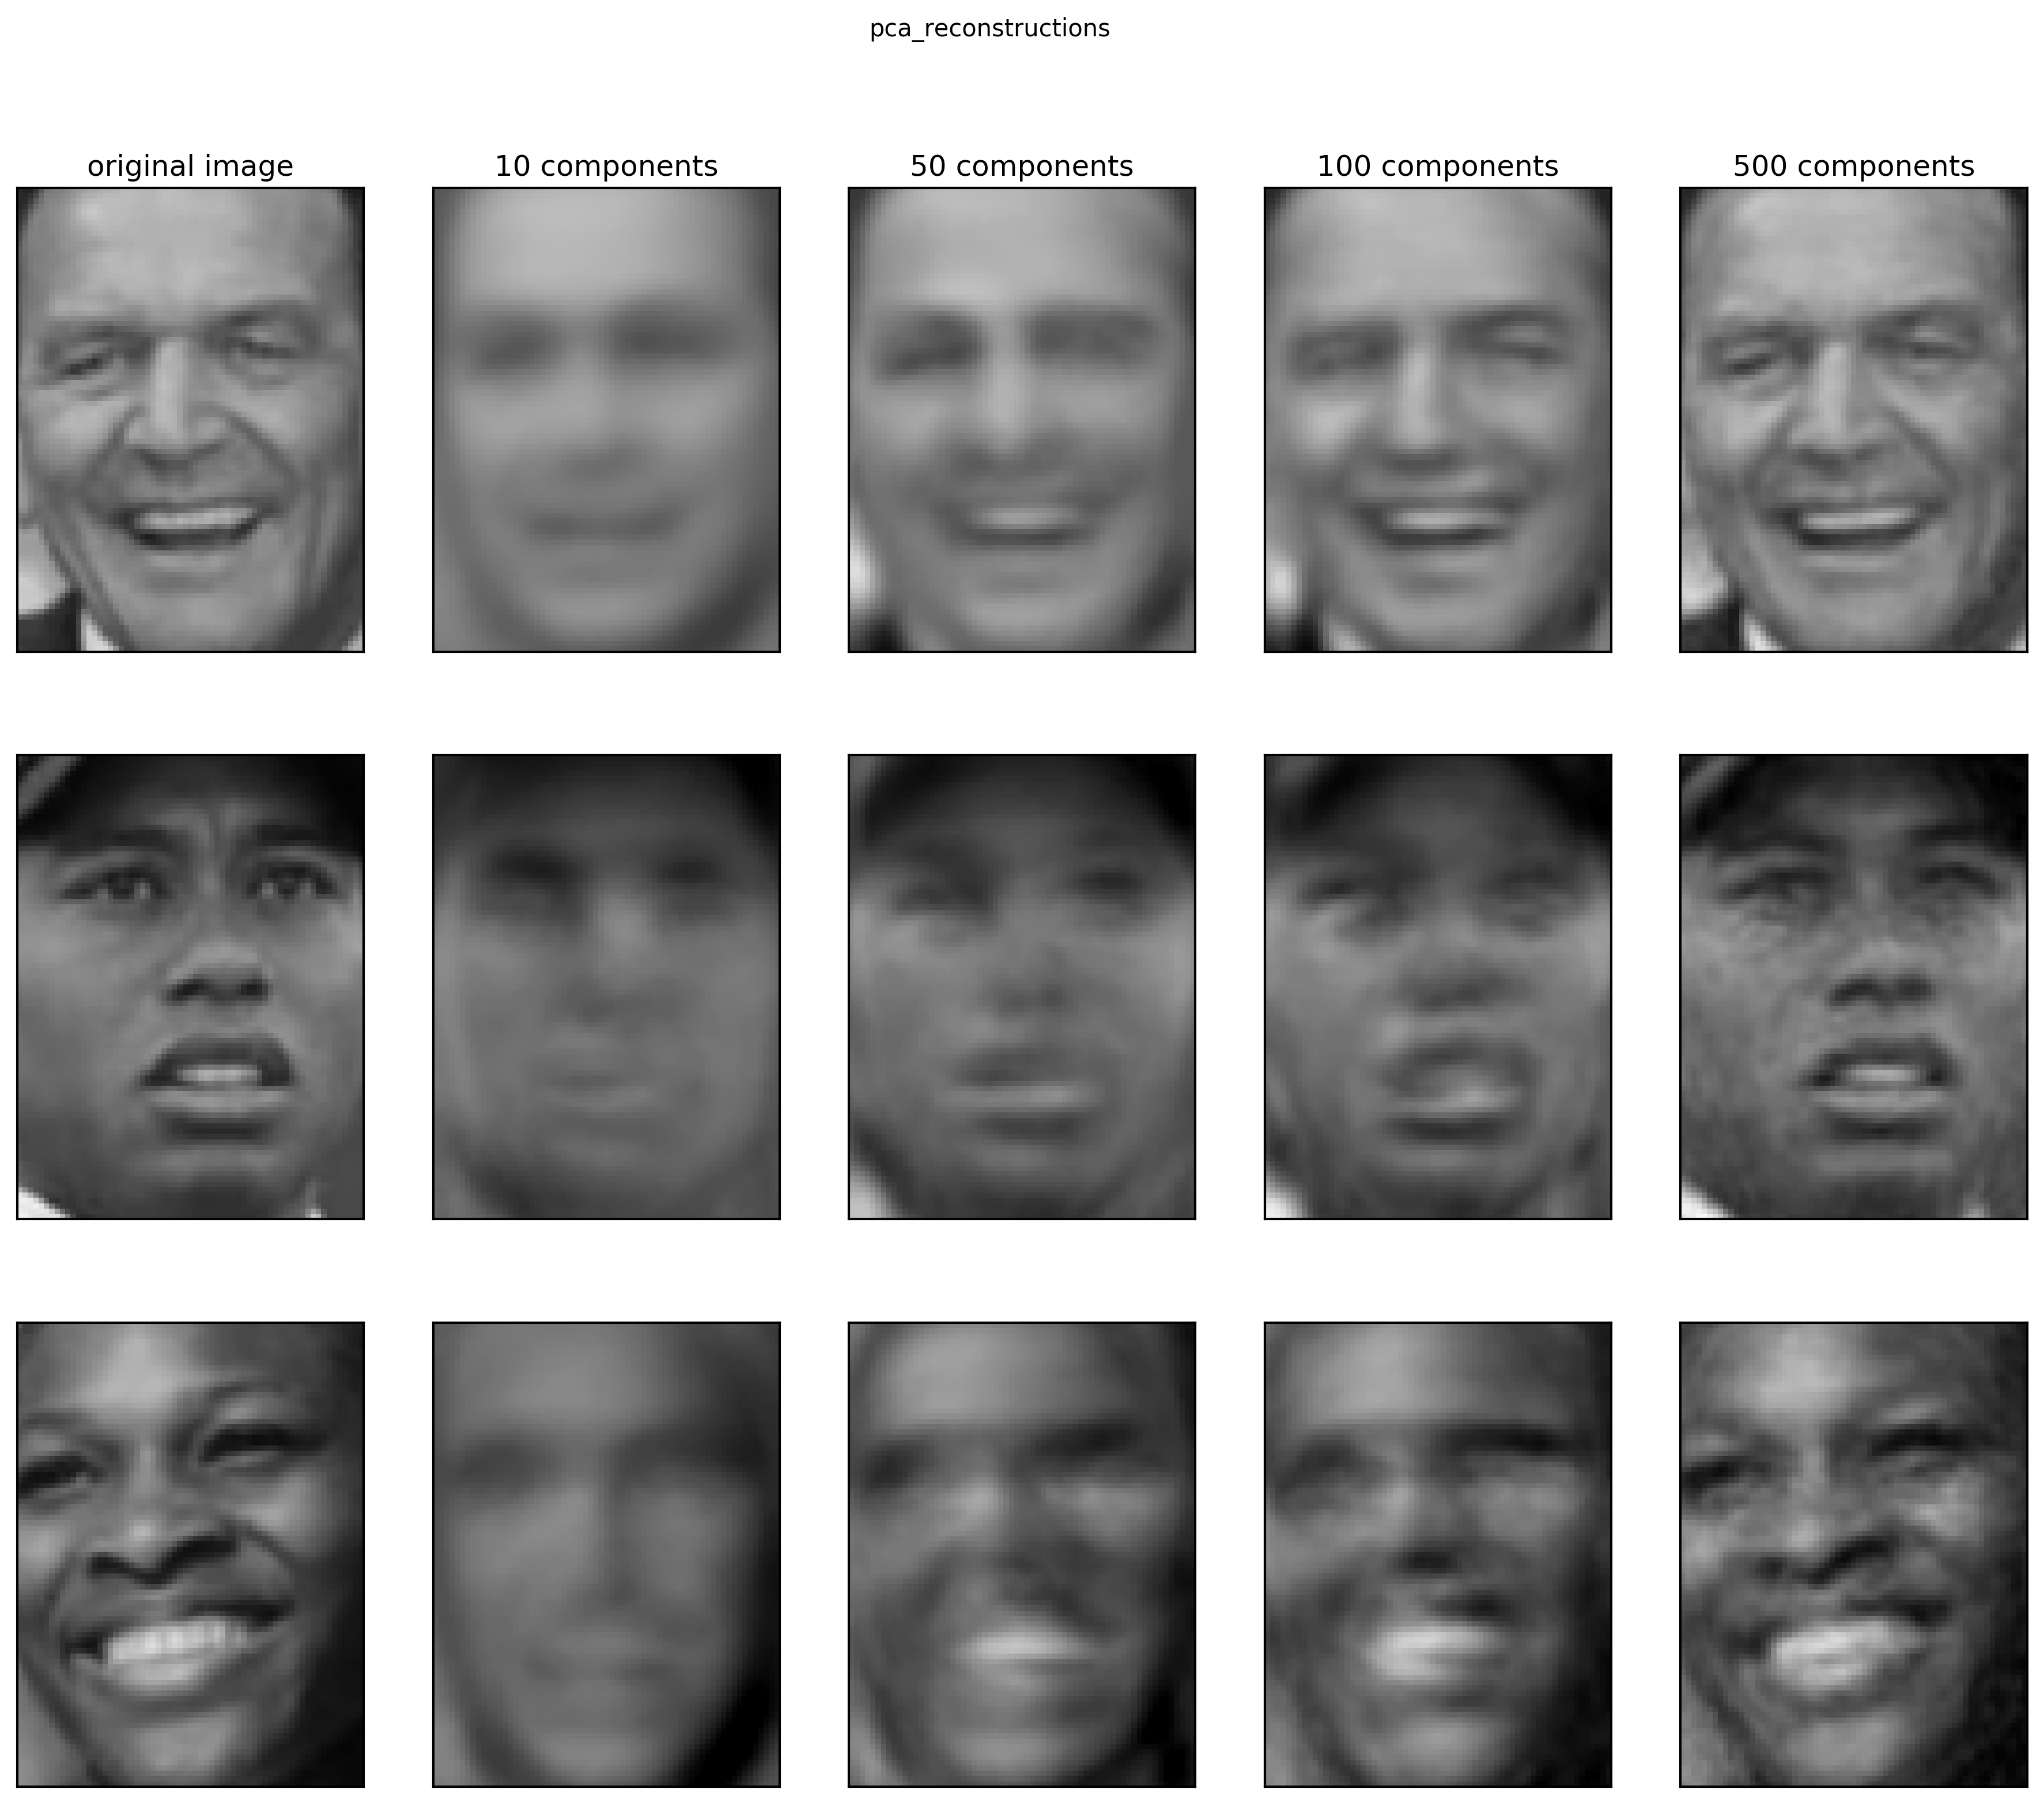

In [32]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)
plt.suptitle("pca_reconstructions");

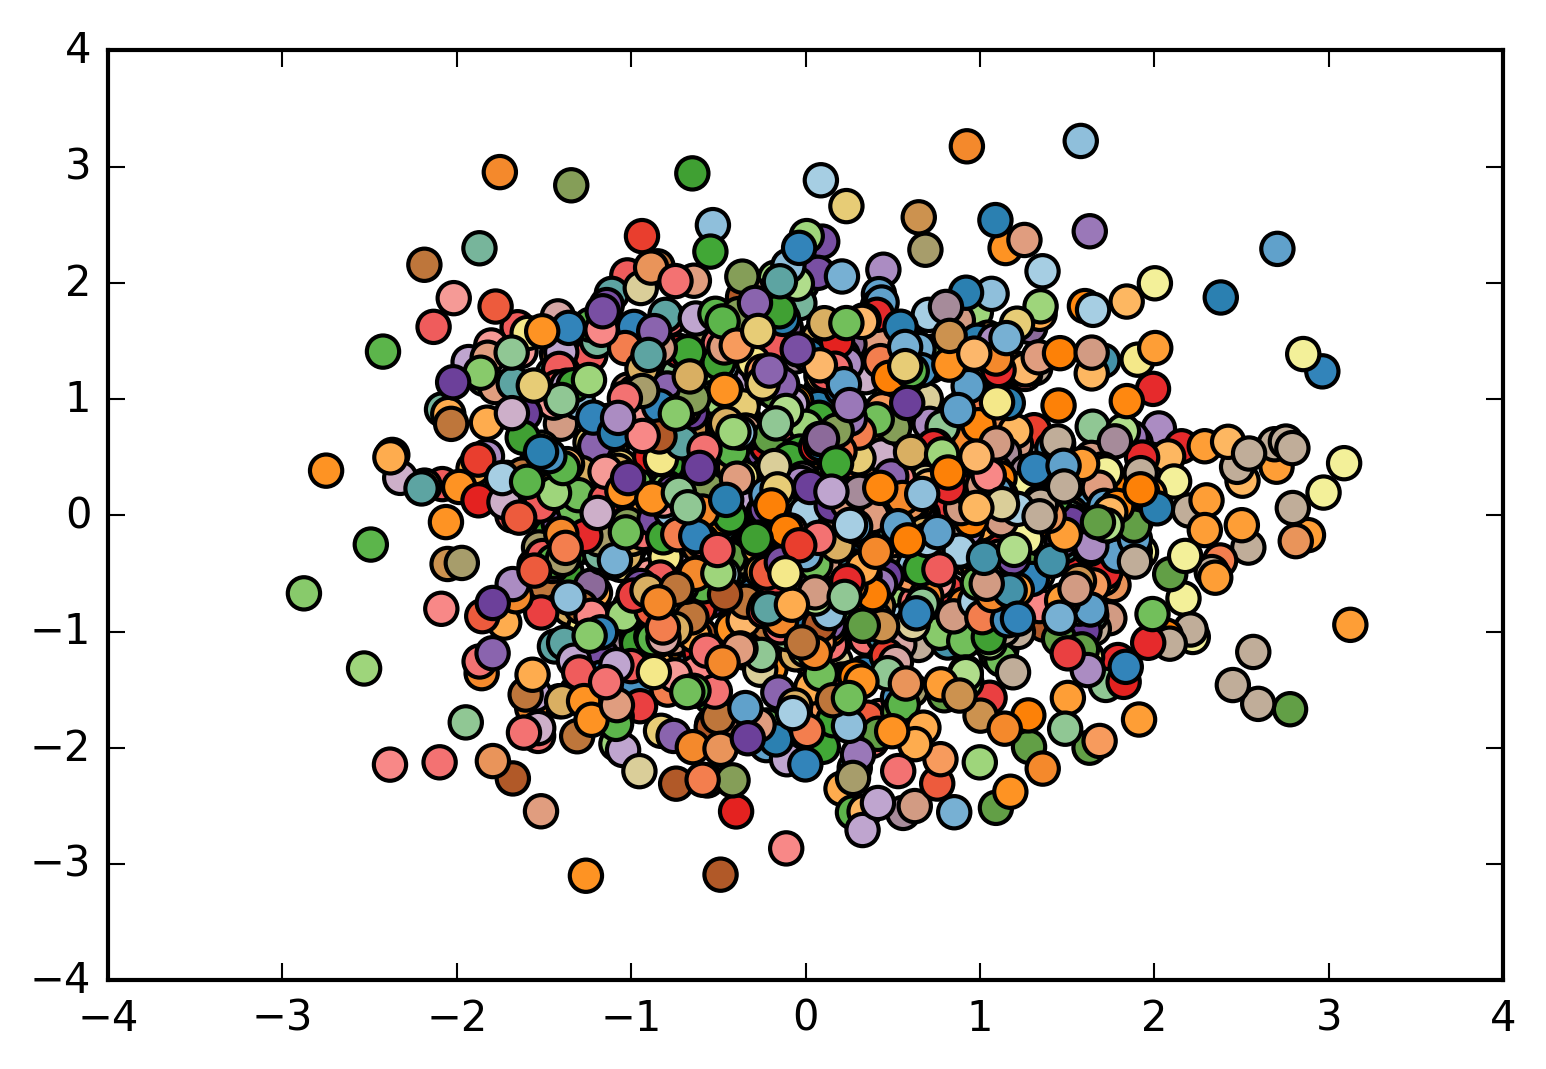

In [33]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='Paired', s=60)

### Non-Negative Matrix Factorization (NMF)
#### Applying NMF to synthetic data

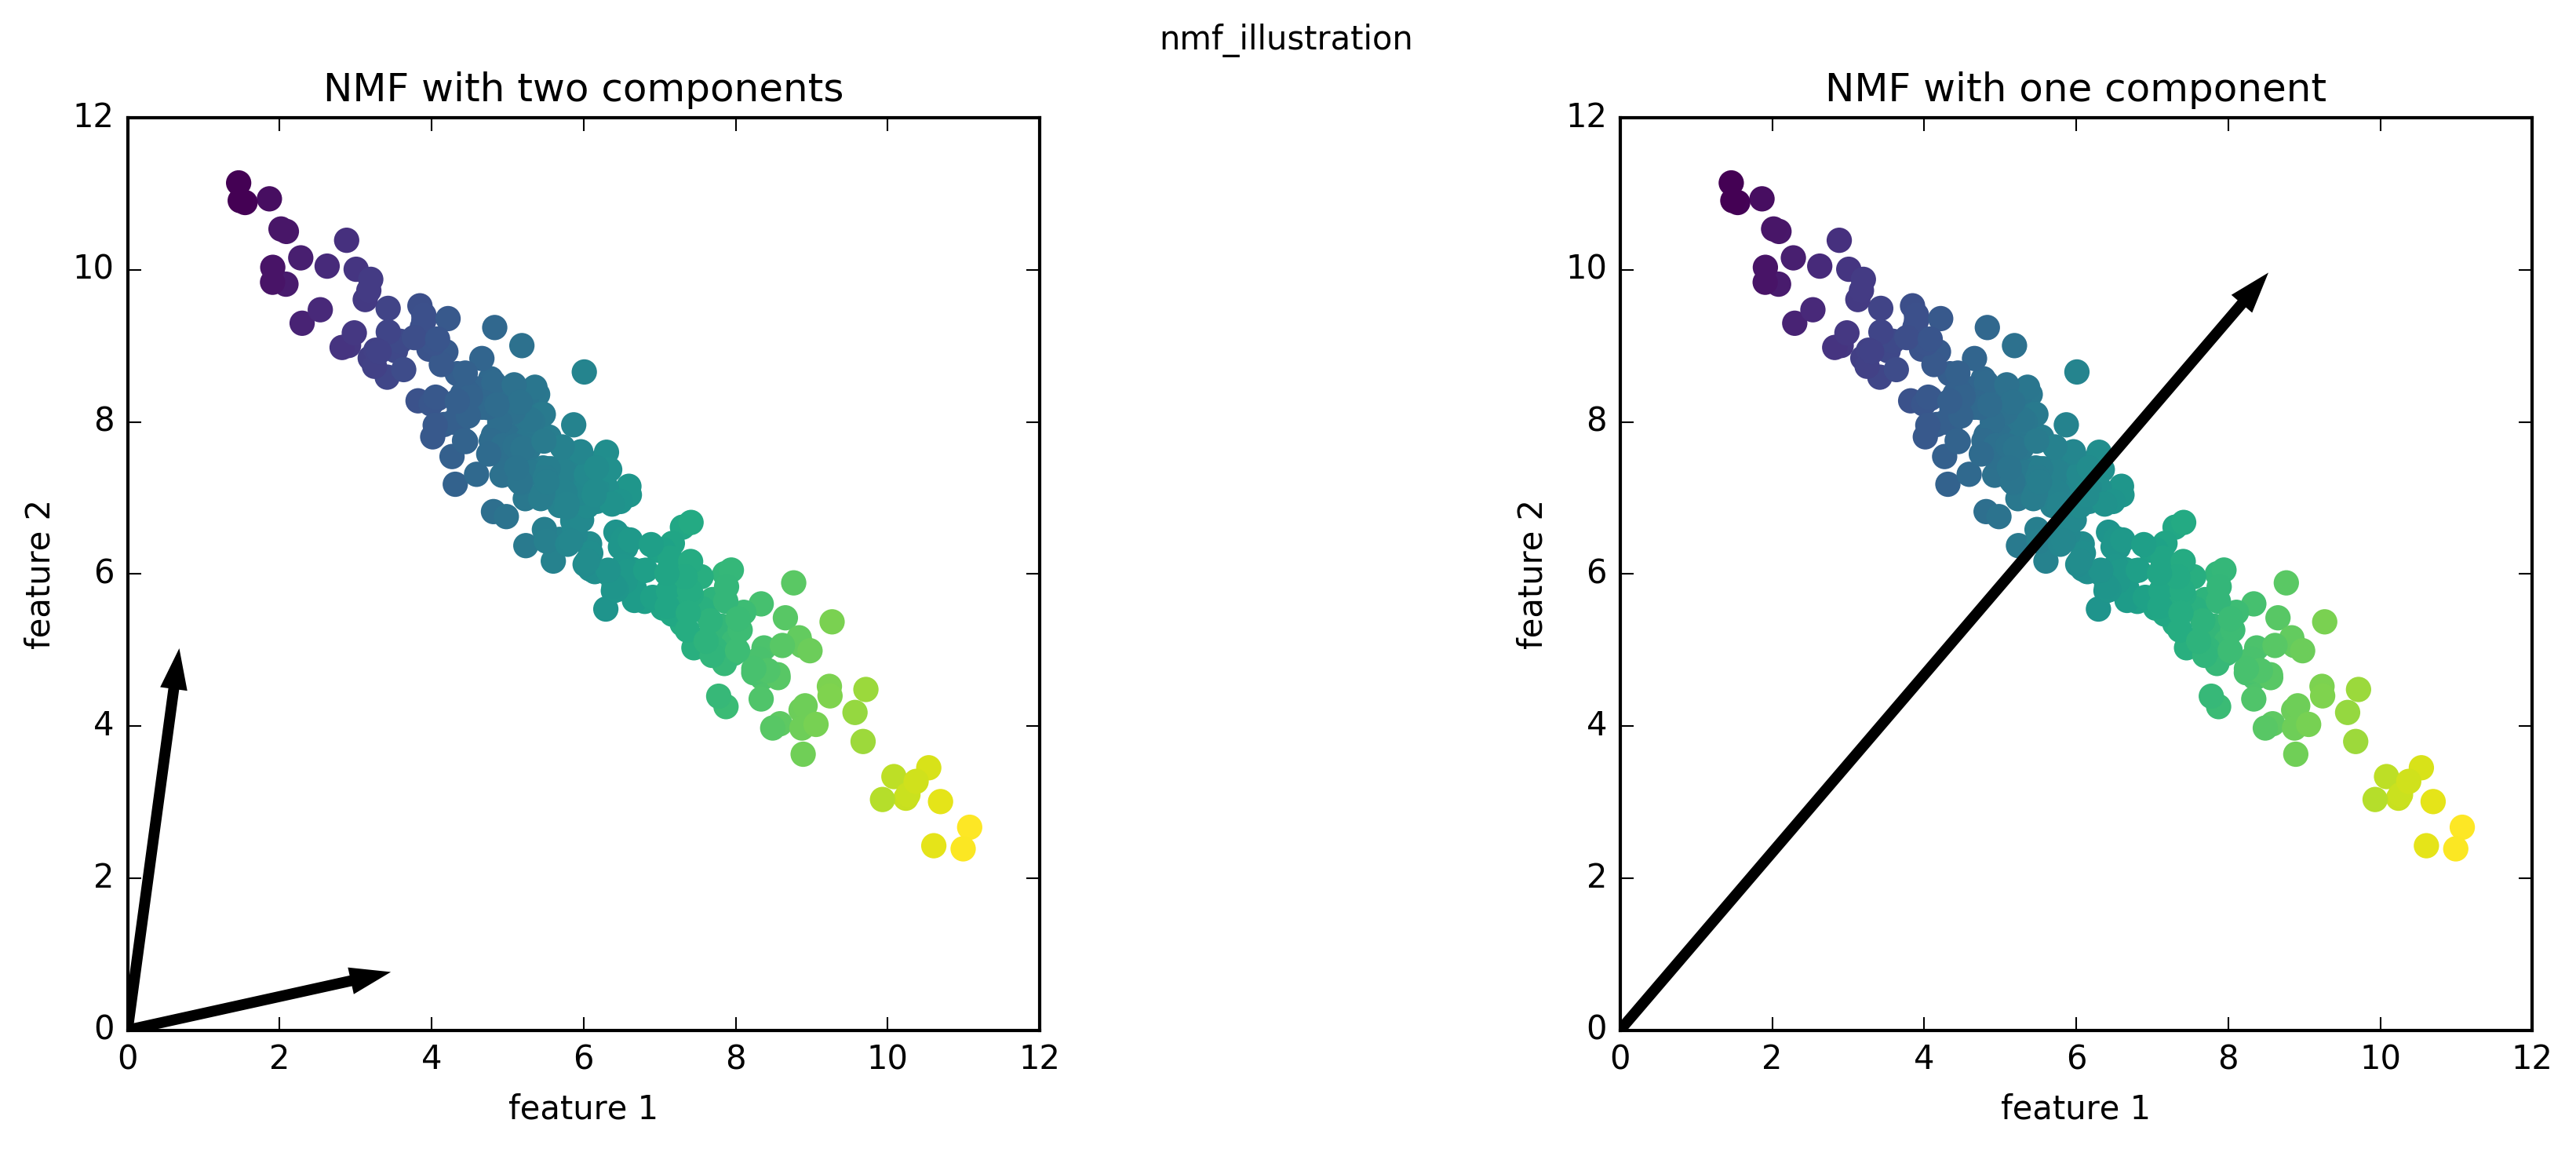

In [ ]:
mglearn.plots.plot_nmf_illustration()
plt.suptitle("nmf_illustration")

#### Applying NMF to face images

In [ ]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[ 0.036601, ...,  0.742484],
       ..., 
       [ 0.105882, ...,  0.393464]], dtype=float32), 
array([[ 0.162091, ...,  0.677124],
       ..., 
       [ 0.109804, ...,  0.07451 ]], dtype=float32))


In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("%d. component" % i)

In [ ]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

### Manifold learning with t-SNE

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [ ]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("first principal component")
plt.ylabel("second principal component")

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method:
digits_tsne = tsne.fit_transform(digits.data)

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})

## Clustering

### k-Means clustering

In [ ]:
mglearn.plots.plot_kmeans_algorithm()
plt.suptitle("kmeans_algorithm");

In [ ]:
mglearn.plots.plot_kmeans_boundaries()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

In [ ]:
print(kmeans.labels_)

In [ ]:
print(kmeans.predict(X))

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap=mglearn.cm3, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', s=100, linewidth=2, c=[0, 1, 2], cmap=mglearn.cm3)


In [ ]:
fig, axes = plt.subplots(1, 2)

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

axes[0].scatter(X[:, 0], X[:, 1], c=assignments, cmap=mglearn.cm2, s=60)

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

axes[1].scatter(X[:, 0], X[:, 1], c=assignments, cmap='jet', s=60);

#### Failure cases of k-Means

In [ ]:
X, y = make_blobs(random_state=0)
plt.scatter(X[:, 0], X[:, 1]);

In [ ]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be streched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=['b', 'r', 'g'], s=60, linewidth=2);

In [ ]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=['b', 'g'], s=60, linewidth=2);

#### Vector Quantization - Or Seeing k-Means as Decomposition

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100)
nmf.fit(X_train)
pca = PCA(n_components=100)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8)) #, subplot_kw={'xticks': (), 'yticks': ()}
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans,
                                         X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=range(kmeans.n_clusters), s=60, linewidth=2, cmap='Paired')
print(y_pred)

In [ ]:
distance_features = kmeans.transform(X)
print(distance_features.shape)
print(distance_features)

### Agglomerative Clustering

In [ ]:
mglearn.plots.plot_agglomerative_algorithm()
plt.suptitle("agglomerative_algorithm");

In [ ]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=assignment, cmap=mglearn.cm3, s=60)

#### Hierarchical Clustering and Dendrograms

In [ ]:
mglearn.plots.plot_agglomerative()

In [ ]:
# import the dendrogram function and the ward clustering function from scipy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# apply the ward clustering to the data array X
# The scipy ward function returns an array that specifies the distances bridged when performing agglomerative clustering
linkage_array = ward(X)
# now we plot the dendrogram for the linkage_array containing the distances between clusters
dendrogram(linkage_array);

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', verticalalignment='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', verticalalignment='center', fontdict={'size': 15})
plt.title("dendrogram")

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
clusters

In [ ]:

fig, axes = plt.subplots(3, 4, figsize=(11, 8), subplot_kw={'xticks': (), 'yticks': ()})
# Plot clusters as red, green and blue, and outliers (-1) as white
colors = np.array(['r', 'g', 'b', 'w'])

# iterate over settings of min_samples and eps
for i, min_samples in enumerate([2, 3, 5]):
    for j, eps in enumerate([1, 1.5, 2, 3]):
        # instantiate DBSCAN with a particular setting
        dbscan = DBSCAN(min_samples=min_samples, eps=eps)
        # get cluster assignments
        clusters = dbscan.fit_predict(X)
        print("min_samples: %d eps: %f  cluster: %s" % (min_samples, eps, clusters))
        # vizualize core samples and clusters.
        sizes = 60 * np.ones(X.shape[0])
        # size is given by whether something is a core sample
        sizes[dbscan.core_sample_indices_] *= 4
        axes[i, j].scatter(X[:, 0], X[:, 1], c=colors[clusters], s=sizes)
        axes[i, j].set_title("min_samples: %d eps: %.1f" % (min_samples, eps))
fig.tight_layout()

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)

#### Comparing and evaluating clustering algorithms
#### Evaluating clustering with ground truth

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random cluster assignment for reference:
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment:
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: %.2f" % adjusted_rand_score(y, random_clusters))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("%s - ARI: %.2f" % (algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [ ]:
from sklearn.metrics import accuracy_score

# These two labelings of points correspond to the same clustering:
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# accuracy is zero, as none of the labels are the same:
print("Accuracy: %.2f" % accuracy_score(clusters1, clusters2))
# adjusted rand score is 1, as the clustering is exactly the same:
print("ARI: %.2f" % adjusted_rand_score(clusters1, clusters2))

#### Evaluating clustering without ground truth

In [ ]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference:
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment:
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: %.2f" % silhouette_score(X_scaled, random_clusters))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("%s : %.2f" % (algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

#### Comparing algorithms on the faces dataset

In [ ]:
# extract eigenfaces from lfw data and transform data
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

#### Analyzing the faces dataset with DBSCAN

In [ ]:
# apply DBSCAN with default parameters
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
np.unique(labels)

In [ ]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
np.unique(labels)

In [ ]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
np.unique(labels)

In [ ]:
# count number of points in all clusters and noise.
# bincount doesn't allow negative numbers, so we need to add 1.
# the first number in the result corresponds to noise points
np.bincount(labels + 1)

In [ ]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [ ]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps=%d" % eps)
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Number of clusters: %s" % np.unique(labels))
    print("Clusters: %s" % np.bincount(labels + 1))

In [ ]:
# dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels)):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, n_images, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(n_images * 1.5, 4))
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):

        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

#### Analyzing the faces dataset with k-Means

In [ ]:
n_clusters = 10
# extract clusters with k-Means
km = KMeans(n_clusters=n_clusters, random_state=0)
labels_km = km.fit_predict(X_pca)
print("cluster sizes k-Means: %s" % np.bincount(labels_km))


In [ ]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

In [ ]:
n_clusters = 10
for cluster in range(n_clusters):
    center = km.cluster_centers_[cluster]
    mask = km.labels_ == cluster
    dists = np.sum((X_pca - center) ** 2, axis=1)
    dists[~mask] = np.inf
    inds = np.argsort(dists)[:5]
    dists[~mask] = -np.inf
    inds = np.r_[inds, np.argsort(dists)[-5:]]
    fig, axes = plt.subplots(1, 11, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(10, 8))
    axes[0].imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)
    for image, label, asdf, ax in zip(X_people[inds], y_people[inds], labels_km[inds], axes[1:]):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title("%s" % (people.target_names[label].split()[-1]), fontdict={'fontsize': 9})
print("kmeans_face_clusters")

#### Analyzing the faces dataset with agglomerative clustering

In [ ]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: %s" % np.bincount(labels_agg))

In [ ]:
adjusted_rand_score(labels_agg, labels_km)

In [ ]:
# import the dendogram function and the ward clustering function from scipy
from scipy.cluster.hierarchy import dendrogram, ward

# apply the ward clustering to the data array X
# The scipy ward function returns an array that specifies the distances bridged
# when performing agglomerative clustering
linkage_array = ward(X_pca)
# now we plot the dendogram for the linkage_array containing the distances between clusters
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True);

In [ ]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title("%s" % people.target_names[label].split()[-1], fontdict={'fontsize': 9})

In [ ]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: %s" % np.bincount(labels_agg))

n_clusters = 40
for cluster in [15, 7, 17, 20, 25, 29]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel(cluster_size)
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title("%s" % (people.target_names[label].split()[-1]), fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

### Summary of Clustering Methods

## Summary and Outlook